# Software de organización de archivos


Antes que nada importamos las librerías necesarias

In [15]:
# importing package
import nltk
import PyPDF2
import textract
# importing package functions
from nltk import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

path = '/home/sistemas/'
path += 'Documentos/Recuperados'
path += '/pdf/Eliminar/Facturas/'
name = path+'f1558602112.pdf'

pdfFileObj = open(name,'rb')

In [2]:
import gensim
#print(dir(gensim))

In [3]:
raw_documents = ["I'm taking the show on the road.",
                 "My socks are a force multiplier.",
             "I am the barber who cuts everyone's hair who doesn't cut their own.",
             "Legend has it that the mind is a mad monkey.",
            "I make my own fun.",
                "Socks are a force for good."]
print("Number of documents:",len(raw_documents))
print raw_documents


('Number of documents:', 6)
["I'm taking the show on the road.", 'My socks are a force multiplier.', "I am the barber who cuts everyone's hair who doesn't cut their own.", 'Legend has it that the mind is a mad monkey.', 'I make my own fun.', 'Socks are a force for good.']


In [4]:
from nltk.tokenize import word_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)] 
            for text in raw_documents]
print(gen_docs)

[['i', "'m", 'taking', 'the', 'show', 'on', 'the', 'road', '.'], ['my', 'socks', 'are', 'a', 'force', 'multiplier', '.'], ['i', 'am', 'the', 'barber', 'who', 'cuts', 'everyone', "'s", 'hair', 'who', 'does', "n't", 'cut', 'their', 'own', '.'], ['legend', 'has', 'it', 'that', 'the', 'mind', 'is', 'a', 'mad', 'monkey', '.'], ['i', 'make', 'my', 'own', 'fun', '.'], ['socks', 'are', 'a', 'force', 'for', 'good', '.']]


In [5]:
tagged = nltk.pos_tag(gen_docs[0])

In [6]:
entities = nltk.chunk.ne_chunk(tagged)

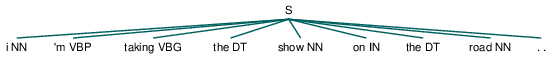

In [7]:
entities

In [8]:
from nltk.corpus import treebank

In [10]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

In [11]:
dictionary = gensim.corpora.Dictionary(gen_docs)
#print(dictionary[5])
#print(dictionary.token2id['road'])
#print("Number of words in dictionary:",len(dictionary))
#for i in range(len(dictionary)):
#    print(i, dictionary[i])

In [12]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
#print(corpus)

In [13]:
tf_idf = gensim.models.refModel(corpus)
#print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
#print(s)

AttributeError: 'module' object has no attribute 'refModel'

In [14]:
sims = gensim.similarities.Similarity('/home/sistemas/Documentos/Scripts/',tf_idf[corpus],
                                      num_features=len(dictionary))
print(sims)
print(type(sims))

NameError: name 'tf_idf' is not defined

In [25]:
query_doc = [w.lower() for w in word_tokenize("Sucks are a force for good.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['sucks', 'are', 'a', 'force', 'for', 'good', '.']
[(1, 1), (8, 1), (9, 1), (10, 1), (36, 1), (37, 1)]
[(8, 0.22710694740248571), (9, 0.3599559952861919), (10, 0.3599559952861919), (36, 0.5870629426886775), (37, 0.5870629426886775)]


In [26]:
sims[query_doc_tf_idf]

array([0.        , 0.3249157 , 0.        , 0.03049686, 0.        ,
       0.9409006 ], dtype=float32)